In [33]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [34]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [35]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [36]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [37]:
len(dataset)

68

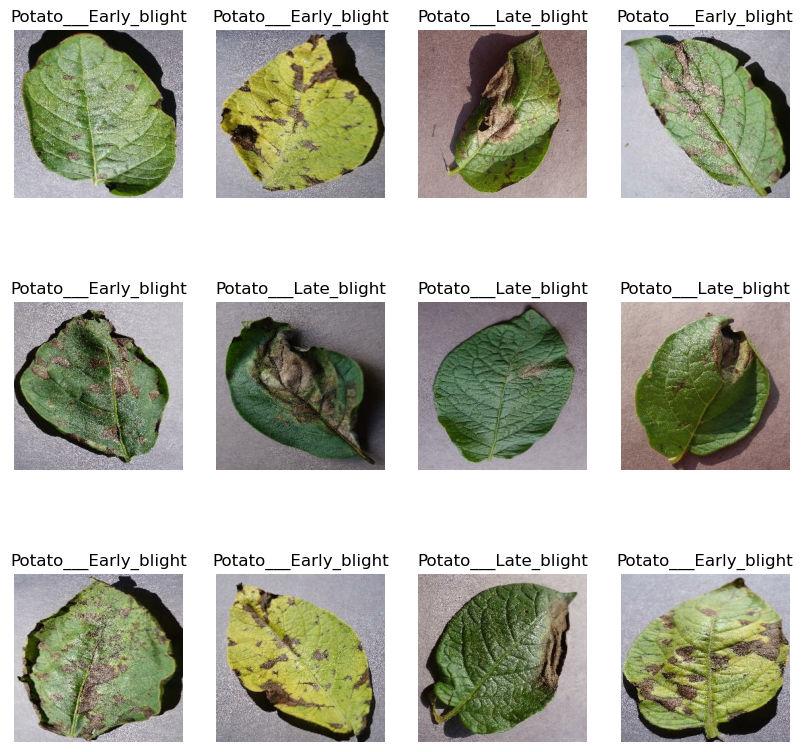

In [38]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

80% ==> training
20% ==> 10% validation,10% test

In [39]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [40]:
train_ds=dataset.take(54)
len(train_ds)

54

In [41]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [42]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [43]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [44]:
test_ds.take(6)
len(val_ds)

6

In [45]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [46]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [47]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [48]:
len(train_ds)

54

In [49]:
len(val_ds)

6

In [50]:
len(test_ds)

8

In [51]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [52]:
resize_and_rescale = tf.keras.Sequential([
     layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
     layers.experimental.preprocessing.Rescaling(1.0/255)
 ])

In [53]:
data_augmentation = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2),
 ])

In [55]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [56]:
 model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [57]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])

In [58]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50


54/54 [==============================] - 251s 4s/step - loss: 0.9115 - accuracy: 0.5127 - val_loss: 0.8540 - val_accuracy: 0.6667
Epoch 2/50
54/54 [==============================] - 79s 1s/step - loss: 0.6964 - accuracy: 0.7060 - val_loss: 0.7341 - val_accuracy: 0.6562
Epoch 3/50
54/54 [==============================] - 40s 748ms/step - loss: 0.5192 - accuracy: 0.7830 - val_loss: 0.4059 - val_accuracy: 0.8333
Epoch 4/50
54/54 [==============================] - 43s 797ms/step - loss: 0.4222 - accuracy: 0.8368 - val_loss: 0.2638 - val_accuracy: 0.8854
Epoch 5/50
54/54 [==============================] - 43s 805ms/step - loss: 0.3567 - accuracy: 0.8414 - val_loss: 0.2689 - val_accuracy: 0.8958
Epoch 6/50
54/54 [==============================] - 44s 820ms/step - loss: 0.2598 - accuracy: 0.8906 - val_loss: 0.1641 - val_accuracy: 0.9271
Epoch 7/50
54/54 [==============================] - 46s 849ms/step - loss: 0.1880 - accuracy: 0.9265 - val_loss: 0.1540 - val_accuracy: 0.9479
Ep

In [59]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 98s 607ms/step - loss: 0.1096 - accuracy: 0.9570


In [60]:
scores

[0.10957310348749161, 0.95703125]

In [61]:
history

In [62]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [63]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

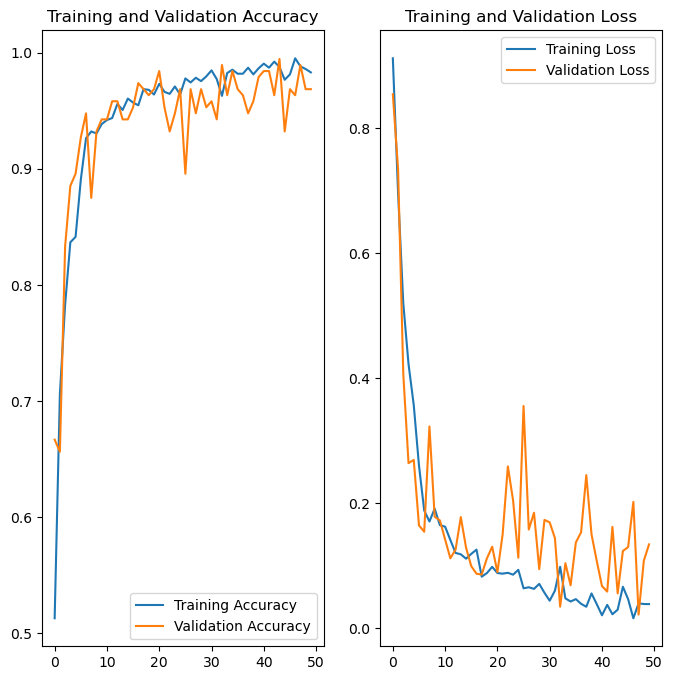

In [67]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2 ,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2 ,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [69]:
import numpy as np

In [70]:
np.argmax([8.8079119e-08, 7.2301570e-03, 9.9276966e-01])

2

first image to predict
actual label: Potato___healthy
1/1 [==============================] - 0s 443ms/step
predicted label :  Potato___healthy


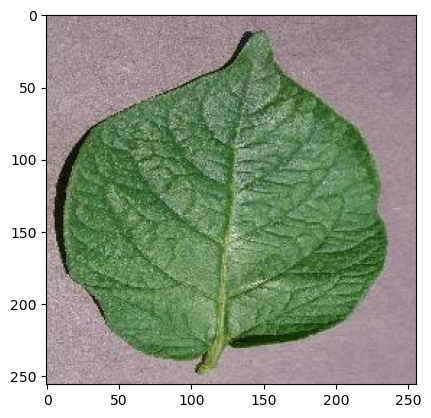

In [72]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label : ",class_names[np.argmax(batch_prediction[0])])

In [73]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 99ms/step


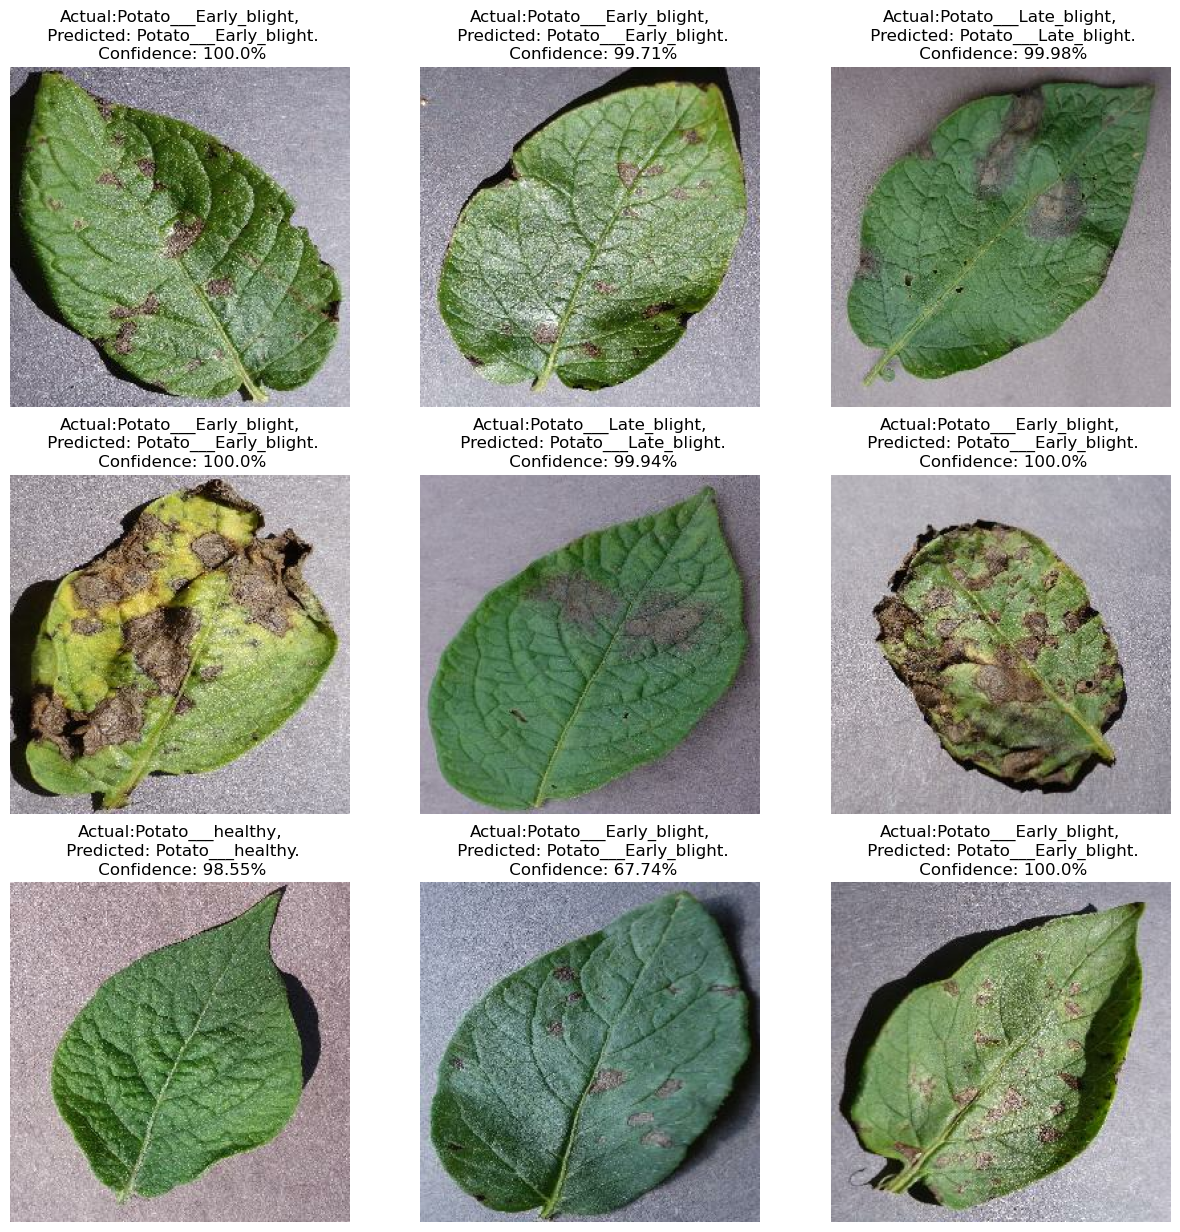

In [78]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3,i +1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [83]:
import os
model_version=max([int(i) for i in os.listdir("../PlantVillage") + [0]])+1
model.save(f"../PlantVillage/{model_version}")

ValueError: invalid literal for int() with base 10: '.ipynb_checkpoints'

In [82]:
model_version=1
model.save(f"../PlantVillage/{model_version}")

INFO:tensorflow:Assets written to: ../PlantVillage/1\assets


INFO:tensorflow:Assets written to: ../PlantVillage/1\assets
